In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델



# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier
# KNN 결측처리
from sklearn.impute import KNNImputer

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
df = pd.read_csv('/home/piai/바탕화면/빅분_백은정/빅데이터분석/Car.csv')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [5]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [6]:
# 연비 숫자와 단위 분리
df[['Mileage', 'Mileage_Unit']] = df['Mileage'].str.split(expand=True)
df[['Engine', 'Engine_Unit']] = df['Engine'].str.split(expand=True)
df[['Power', 'Power_Unit']] = df['Power'].str.split(expand=True)
df[['New_Price', 'New_Price_Unit']] = df['New_Price'].str.split(expand=True)

# 컬럼명에 단위 표기
df.rename(columns={"Mileage": "Mileage_kml", "Engine":"Engine_CC", "Power":"Power_bhp","New_Price":"New_Price(Lakh)"}, inplace=True)
# 단위 컬럼 제거
df.drop(['Engine_Unit', 'Mileage_Unit', 'Power_Unit', "New_Price_Unit"], axis=1, inplace=True)

# 숫자형 컬럼으로 변경
df['Engine_CC'] = pd.to_numeric(df['Engine_CC'], errors='coerce')
df['Mileage_kml'] = pd.to_numeric(df['Mileage_kml'], errors='coerce')
df['Power_bhp'] = pd.to_numeric(df['Power_bhp'], errors='coerce')
df['New_Price(Lakh)'] = pd.to_numeric(df['New_Price(Lakh)'], errors='coerce')

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,New_Price(Lakh)
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN


In [7]:
# Mileage(km/l) 컬럼에 '0.0'값 발견
print(df['Mileage_kml'].value_counts())
# 'null'값이 갯수 확인
print(len(df[df['Mileage_kml'] == 0.0]))
# 문자 'null'을 np.nan으로 변경
df['Mileage_kml'].replace(0.0, np.nan, inplace=True)

17.00    208
18.90    201
18.60    144
21.10    107
20.36    105
        ... 
17.09      1
19.91      1
17.16      1
18.23      1
17.15      1
Name: Mileage_kml, Length: 438, dtype: int64
81


## 결측치를 같은값으로 보간할 수 있는지 비교

In [8]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              46
Power_bhp             175
Seats                  53
New_Price(Lakh)      6247
dtype: int64

### Price

* 목표변수이므로 보간x

###  Mileage(km/l)

In [9]:
NPN = df[df['Mileage_kml'].isnull() == True]['Name']
NP = df[df['Mileage_kml'].isnull() == False]['Name']

In [10]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

3


In [11]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Engine_CC'].isnull()].index
    npower = df.loc[np_idx, 'Engine_CC'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Engine_CC'] = npower

In [12]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              43
Power_bhp             175
Seats                  53
New_Price(Lakh)      6247
dtype: int64

* 83개의 결측값 중 3개 보간

### Engine(CC)

In [13]:
NPN = df[df['Engine_CC'].isnull() == True]['Name']
NP = df[df['Engine_CC'].isnull() == False]['Name']

In [14]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

3


In [15]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Engine_CC'].isnull()].index
    npower = df.loc[np_idx, 'Engine_CC'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Engine_CC'] = npower

In [16]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              40
Power_bhp             175
Seats                  53
New_Price(Lakh)      6247
dtype: int64

* 46개의 결측값 중 6개 보간

### Power(bhp)

In [17]:
NPN = df[df['Power_bhp'].isnull() == True]['Name']
NP = df[df['Power_bhp'].isnull() == False]['Name']

In [18]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

39


In [19]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Power_bhp'].isnull()].index
    npower = df.loc[np_idx, 'Power_bhp'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Power_bhp'] = npower

In [20]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              40
Power_bhp             136
Seats                  53
New_Price(Lakh)      6247
dtype: int64

* 175개의 결측값 중 39개 보간

### Seats

In [21]:
NPN = df[df['Seats'].isnull() == True]['Name']
NP = df[df['Seats'].isnull() == False]['Name']

In [22]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

7


In [23]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Seats'].isnull()].index
    npower = df.loc[np_idx, 'Seats'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Seats'] = npower

In [24]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              40
Power_bhp             136
Seats                  46
New_Price(Lakh)      6247
dtype: int64

* 53개의 결측값 중 7개 보간

### New_Price(Lakh)

In [25]:
NPN = df[df['New_Price(Lakh)'].isnull() == True]['Name']
NP = df[df['New_Price(Lakh)'].isnull() == False]['Name']

In [26]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

227


In [27]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['New_Price(Lakh)'].isnull()].index
    npower = df.loc[np_idx, 'New_Price(Lakh)'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'New_Price(Lakh)'] = npower

In [28]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              40
Power_bhp             136
Seats                  46
New_Price(Lakh)      6020
dtype: int64

* 6247개의 결측값 중 227개 보간

## 결측치 처리

In [29]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              40
Power_bhp             136
Seats                  46
New_Price(Lakh)      6020
dtype: int64

In [30]:
# Data shape 확인
df.shape

(7253, 13)

In [31]:
print(f'New_Price(Lakh)컬럼의 결측치 비율 : {6020/7253*100}%')

New_Price(Lakh)컬럼의 결측치 비율 : 83.00013787398318%


In [32]:
# 'New_Price(Lakh)'행 제외
df = df.drop('New_Price(Lakh)', axis=1)

* 결측값이 0.83이므로 대체하기보다는 열 자체를 제외하기로 판단.

In [33]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              40
Power_bhp             136
Seats                  46
dtype: int64

In [34]:
df.corr()

,Price,Year,Kilometers_Driven,Mileage_kml,Engine_CC,Power_bhp,Seats
Price,1.000000,0.303140,-0.014603,-0.325996,0.640075,0.754943,0.052851
Year,0.303140,1.000000,-0.187859,0.301037,-0.054194,0.015409,0.008798
Kilometers_Driven,-0.014603,-0.187859,1.000000,-0.069449,0.094778,0.029445,0.090160
Mileage_kml,-0.325996,0.301037,-0.069449,1.000000,-0.645327,-0.550951,-0.348028
Engine_CC,0.640075,-0.054194,0.094778,-0.645327,1.000000,0.859473,0.399333
Power_bhp,0.754943,0.015409,0.029445,-0.550951,0.859473,1.000000,0.096774
Seats,0.052851,0.008798,0.090160,-0.348028,0.399333,0.096774,1.000000


In [35]:
# KNN 보간을 위해 필요한 열 선택
columns_to_interpolate = ['Mileage_kml', 'Engine_CC', 'Power_bhp', 'Seats']
KKK = []
# 표준화를 위해 StandardScaler 사용
scaler = StandardScaler()
df[columns_to_interpolate] = scaler.fit_transform(df[columns_to_interpolate])

# KNN 보간 수행
imputer = KNNImputer(n_neighbors=5)
df[columns_to_interpolate] = imputer.fit_transform(df[columns_to_interpolate])

# 보간된 데이터를 표준화된 스케일에서 원래 스케일로 변환
df[columns_to_interpolate] = scaler.inverse_transform(df[columns_to_interpolate])

* 'Mileage(km/l)','Engine(CC)','Power(bhp)','Seats'컬럼들간의 상관성 확인 후 KNN평균값으로 결측치 대체

In [36]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml             0
Engine_CC               0
Power_bhp               0
Seats                   0
dtype: int64

In [37]:
# Price(목표변수) 결측 행 제거
df.dropna(inplace=True)

In [38]:
# 인덱스 초기화
df.reset_index(drop=True, inplace=True)
df.shape

(6200, 12)

## 파생변수 생성

In [39]:
# 브랜드명 컬럼 생성
df['Brand'] = df['Name'].str.split().str[0]
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi


In [40]:
# 브랜드별 국적 라벨링
nationality_mapping = {
    'Maruti': '인도',
    'Hyundai': '한국',
    'Honda': '일본',
    'Toyota': '일본',
    'Mercedes-Benz': '독일',
    'Volkswagen': '독일',
    'Ford': '미국',
    'Mahindra': '인도',
    'BMW': '독일',
    'Audi': '독일',
    'Tata': '인도',
    'Skoda': '체코',
    'Renault': '프랑스',
    'Chevrolet': '미국',
    'Nissan': '일본',
    'Land': '영국',
    'Jaguar': '영국',
    'Fiat': '이탈리아',
    'Mitsubishi': '일본',
    'Mini': '영국',
    'Volvo': '스웨덴',
    'Porsche': '독일',
    'Jeep': '미국',
    'Datsun': '일본',
    'ISUZU': '일본',
    'Force': '인도',
    'Bentley': '영국',
    'Smart': '독일',
    'Ambassador': '인도',
    'Lamborghini': '이탈리아',
    'Hindustan': '인도',
    'OpelCorsa': '독일'
}

In [41]:
df['Nationality'] = df['Brand'].map(nationality_mapping)

In [42]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand,Nationality
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,인도
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,한국
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,일본
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,인도
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,독일


Owner_Type 변수 수치화

In [43]:
df['Owner_Type']=df['Owner_Type'].replace('First', 1)
df['Owner_Type']=df['Owner_Type'].replace('Second', 2)
df['Owner_Type']=df['Owner_Type'].replace('Third', 3)
df['Owner_Type']=df['Owner_Type'].replace('Fourth & Above', 4)
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand,Nationality
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,Maruti,인도
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,Hyundai,한국
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,Honda,일본
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,Maruti,인도
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,Audi,독일


#### Boxplot을 활용한 이상치 확인

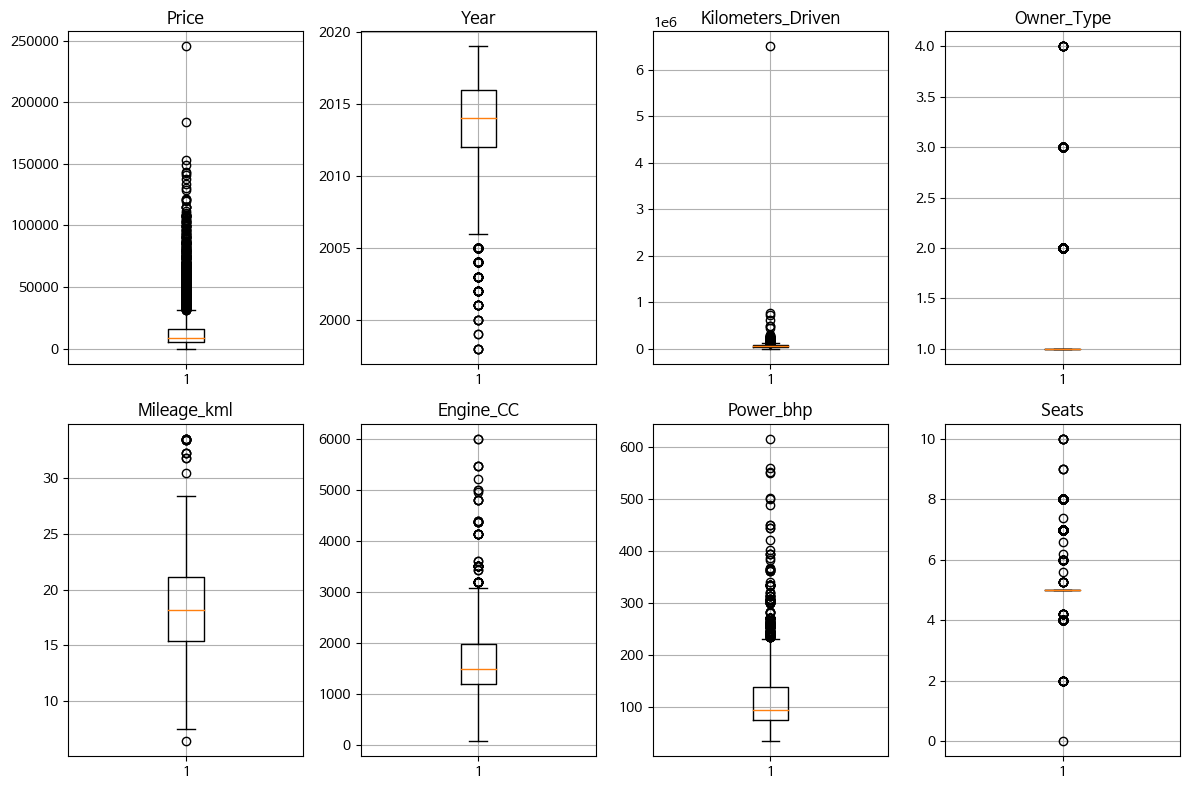

In [44]:
# 박스플롯 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.boxplot(df[col], whis=1.5)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

* 자동차는 브랜드별 가종별로 그 편차가 크기 때문에 1.5IQR수염으로는 이상치를 판단하기 어려움

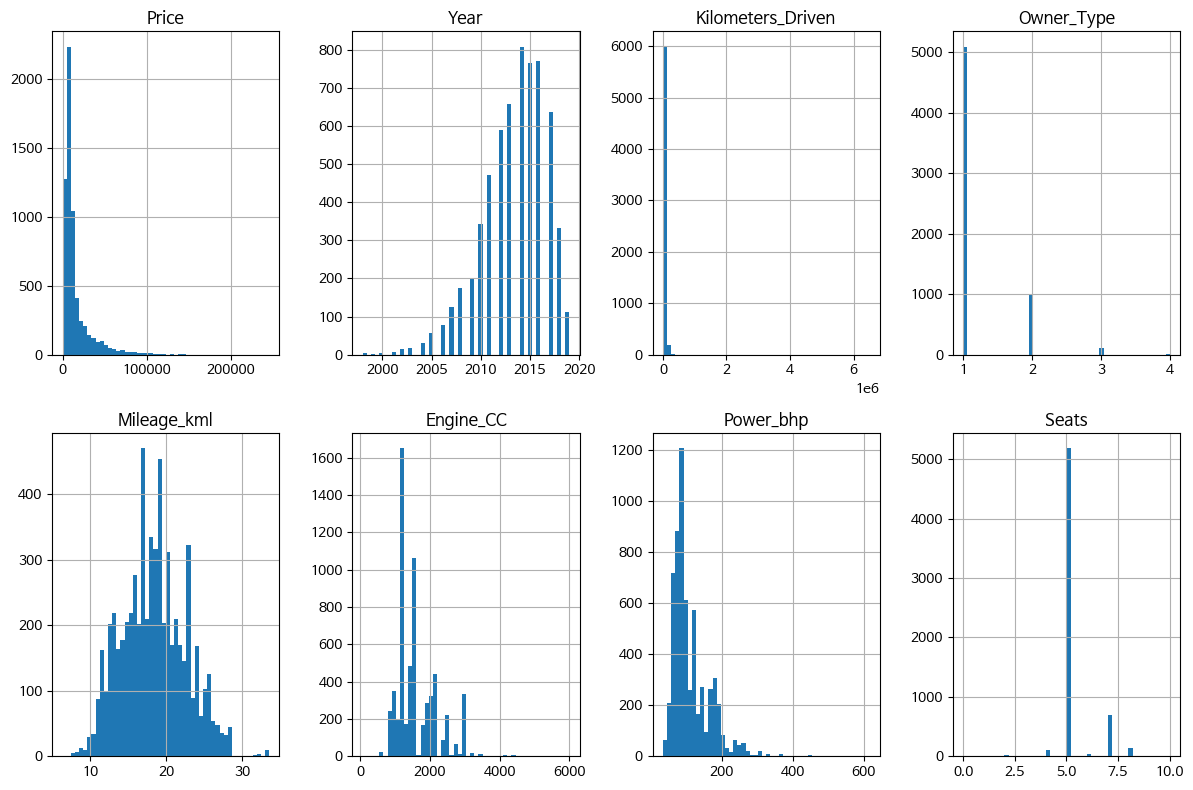

In [45]:
# 히스토그램 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 히스토그램 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

In [46]:
df[df['Price']>150000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand,Nationality
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,245273.6,2017,25000,Diesel,Automatic,1,13.33,2993.0,255.0,5.0,Land,영국
5781,Lamborghini Gallardo Coupe,Delhi,183955.2,2011,6500,Petrol,Automatic,3,6.40,5204.0,560.0,2.0,Lamborghini,이탈리아
5919,Jaguar F Type 5.0 V8 S,Hyderabad,153296.0,2015,8000,Petrol,Automatic,1,12.50,5000.0,488.1,2.0,Jaguar,영국


* 1.5억 이상의 기종 확인 결과 이상치가 아니라고 판단

In [47]:
df[df['Year']<2005]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand,Nationality
222,Maruti Wagon R LXI,Chennai,1916.20,2004,61000,Petrol,Manual,2,18.90,998.0,67.100,5.0,Maruti,인도
274,Maruti Zen VXI BSII,Mumbai,843.13,2002,60000,Petrol,Manual,3,17.30,993.0,60.000,5.0,Maruti,인도
315,Tata Sumo Delux,Hyderabad,2299.44,2000,158000,Diesel,Manual,2,14.07,2956.0,83.100,7.0,Tata,인도
336,Toyota Corolla H4,Chennai,3832.40,2004,105000,Petrol,Automatic,2,11.30,1794.0,125.000,5.0,Toyota,일본
364,Maruti Zen LX,Kolkata,996.42,2003,65000,Petrol,Manual,1,17.30,993.0,60.000,5.0,Maruti,인도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,Maruti Wagon R LX,Pune,1532.96,2004,94000,Petrol,Manual,2,18.90,998.0,67.100,5.0,Maruti,인도
5914,Skoda Octavia Elegance 1.9 TDI,Hyderabad,3449.16,2003,132000,Diesel,Manual,1,18.70,1896.0,66.000,5.0,Skoda,체코
5926,Maruti 800 DX BSII,Pune,843.13,2000,78000,Petrol,Manual,1,16.10,796.0,37.000,4.0,Maruti,인도
5943,Mahindra Jeep MM 540 DP,Chennai,2606.03,2002,75000,Diesel,Manual,1,14.72,2112.0,147.336,6.0,Mahindra,인도


* 2005년식 이하의 기종 확인 결과 이상치가 아니라고 판단

In [48]:
df[df['Kilometers_Driven']>1000000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand,Nationality
2328,BMW X5 xDrive 30d M Sport,Chennai,99642.4,2017,6500000,Diesel,Automatic,1,15.97,2993.0,258.0,5.0,BMW,독일


In [49]:
df = df.drop(df[df['Kilometers_Driven']>1000000].index, axis=0).reset_index()

* 주행거리가 100만킬로미터 이상인 항목 확인결과 이상치로 판단하여 제거

In [50]:
df[df['Seats']<2]

,index,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand,Nationality
3998,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,27593.28,2012,125000,Petrol,Automatic,1,10.5,3197.0,302.3,0.0,Audi,독일


In [51]:
df = df.drop(df[df['Seats']<2].index, axis=0).reset_index()

* 좌석 수 0으로 표기된 항목 제거

#### 이상치 제거 완료

## EDA

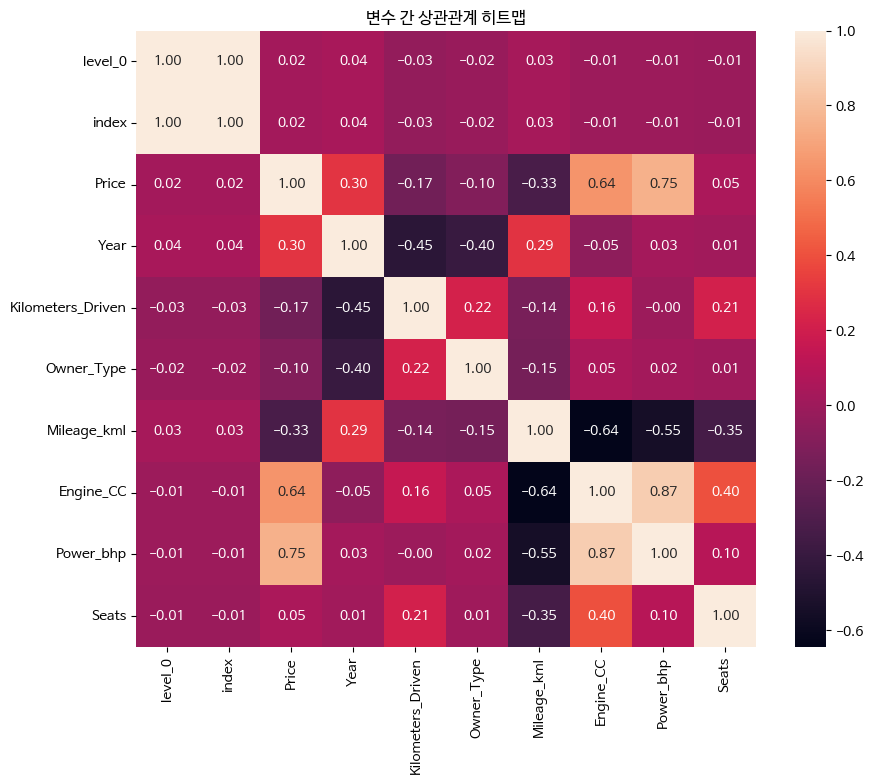

In [52]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그림 크기 설정
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("변수 간 상관관계 히트맵")  # 그래프 제목
plt.show()

* 엔진CC와 연비 음의 상관관계(-0.64)
* 마력과 연비 음의 상관관계(-0.55)
* 가격과 마력 양의 상관관계(0.75)
* 가격과 엔진CC 양의 상관관계(0.64)
* 엔진CC와 마력 양의 상관관계(0.87)

In [53]:
df.to_csv("/home/piai/바탕화면/중고차.csv", encoding = "euc-kr")

<Axes: title={'center': 'Price'}, xlabel='Fuel_Type'>

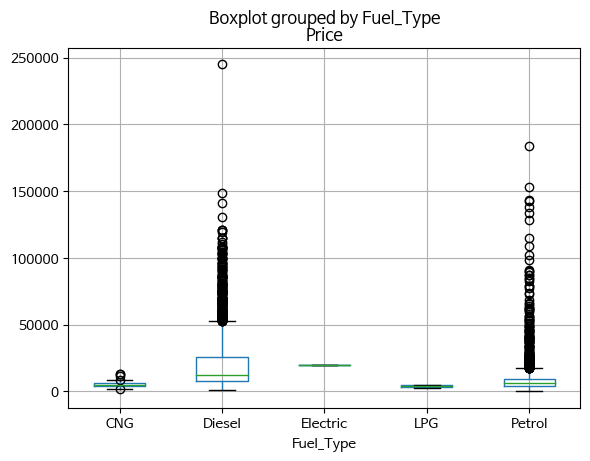

In [54]:
# H0: 연료유형 별로 중고차 가격에 차이가 없다.
# H1: 연료유형 중 적어도 하나의 연료유형은 중고차 가격에 차이가 있다.
# anova 검정

df_1 = pd.DataFrame(df)
df_1.boxplot(column = 'Price', by = 'Fuel_Type')

In [55]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

Diesel_data = df[df['Fuel_Type'] == 'Diesel']['Price']

statistic, p = stats.shapiro(Diesel_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.7403157949447632, p-value=0.0


In [56]:
Petrol_data = df[df['Fuel_Type'] == 'Petrol']['Price']

statistic, p = stats.shapiro(Petrol_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.4448670744895935, p-value=0.0


In [57]:
CNG_data = df[df['Fuel_Type'] == 'CNG']['Price']

statistic, p = stats.shapiro(CNG_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.8620015382766724, p-value=1.105625051422976e-05


In [58]:
LPG_data = df[df['Fuel_Type'] == 'LPG']['Price']

statistic, p = stats.shapiro(LPG_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9055684804916382, p-value=0.2519165873527527


In [59]:
# Electric_data = df[df['Fuel_Type'] == 'Electric']['Price']

# statistic, p = stats.shapiro(Electric_data)
# print("statistic={}, p-value={}".format(statistic, p))

In [60]:
grouped_data = df.groupby('Fuel_Type')['Price'].apply(list)
statistic, p = stats.bartlett(*grouped_data)

print("statistic={}, p-value={}".format(statistic, p))

statistic=904.0736255523367, p-value=2.182931397457489e-194


In [61]:
# ANOVA 실행
grouped_data = df.groupby('Fuel_Type')['Price'].apply(list)
f_result = stats.f_oneway(*grouped_data)

# ANOVA의 f값, p값 저장
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

# ANOVA의 f값, p값 출력
print("One-way ANOVA")
print("F 통계량:{}".format(f))
print("p-value:{}".format(p))

One-way ANOVA
F 통계량:172.738
p-value:0.0


In [ ]:
#

In [62]:
df.head()

,level_0,index,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand,Nationality
0,0,0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,Maruti,인도
1,1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,Hyundai,한국
2,2,2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,Honda,일본
3,3,3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,Maruti,인도
4,4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,Audi,독일


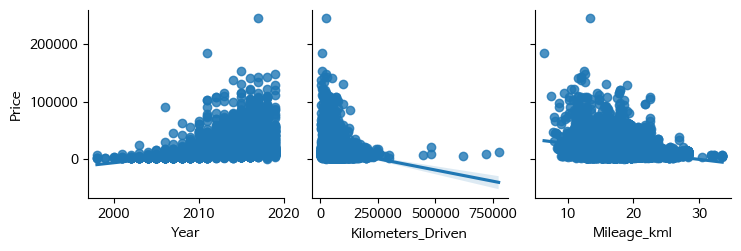

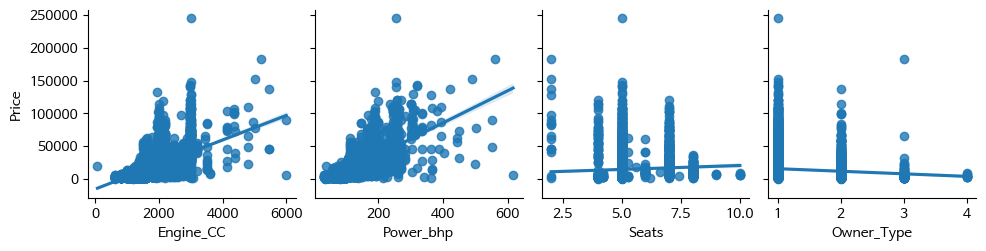

In [63]:
sns.pairplot(df, y_vars = "Price", x_vars = ["Year", "Kilometers_Driven", "Mileage_kml"], kind = 'reg')
sns.pairplot(df, y_vars = "Price", x_vars = ["Engine_CC", "Power_bhp", "Seats", "Owner_Type"], kind = 'reg')

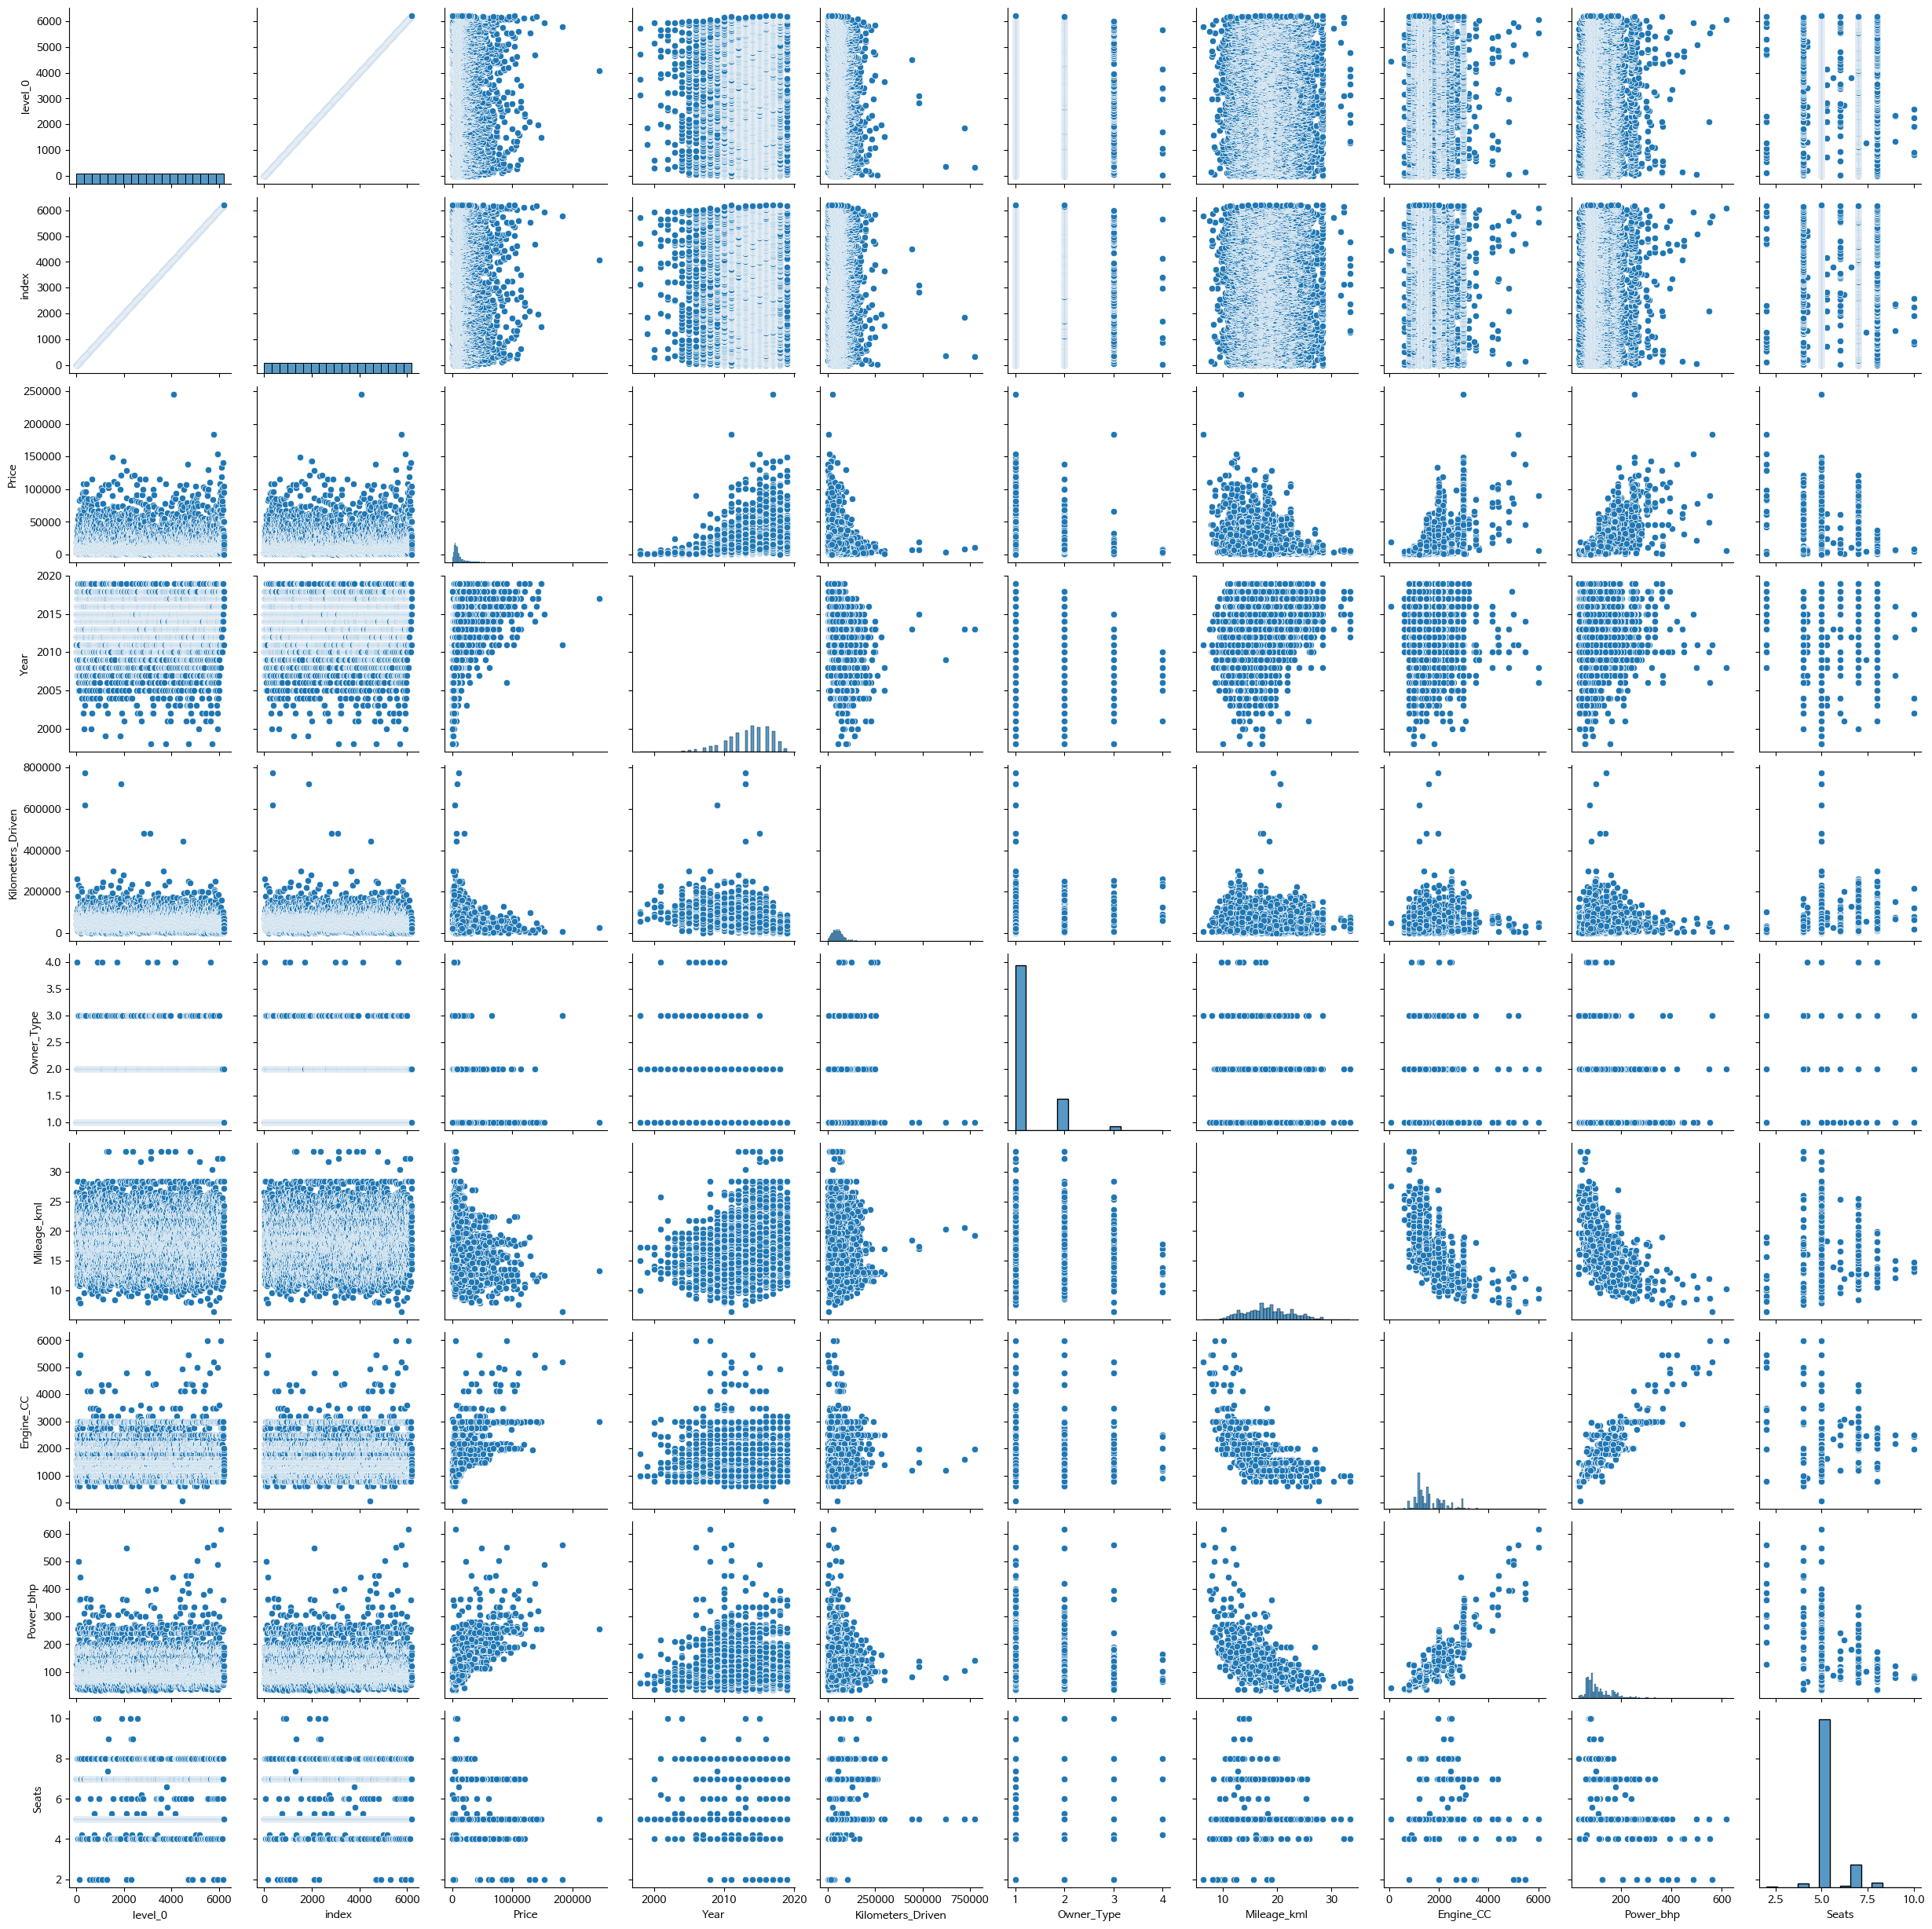

In [64]:
# 설명변수 간의 선형관계 확인
sns.pairplot(df)

In [65]:
df.corr().round(3)

,level_0,index,Price,Year,Kilometers_Driven,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats
level_0,1.000,1.000,0.018,0.041,-0.034,-0.017,0.034,-0.007,-0.008,-0.010
index,1.000,1.000,0.018,0.041,-0.034,-0.017,0.034,-0.007,-0.008,-0.010
Price,0.018,0.018,1.000,0.303,-0.167,-0.100,-0.327,0.639,0.754,0.055
Year,0.041,0.041,0.303,1.000,-0.455,-0.398,0.294,-0.054,0.027,0.013
Kilometers_Driven,-0.034,-0.034,-0.167,-0.455,1.000,0.220,-0.142,0.156,-0.002,0.213
Owner_Type,-0.017,-0.017,-0.100,-0.398,0.220,1.000,-0.151,0.050,0.018,0.010
Mileage_kml,0.034,0.034,-0.327,0.294,-0.142,-0.151,1.000,-0.644,-0.548,-0.346
Engine_CC,-0.007,-0.007,0.639,-0.054,0.156,0.050,-0.644,1.000,0.865,0.400
Power_bhp,-0.008,-0.008,0.754,0.027,-0.002,0.018,-0.548,0.865,1.000,0.098
Seats,-0.010,-0.010,0.055,0.013,0.213,0.010,-0.346,0.400,0.098,1.000


In [66]:
# train/test data 분리
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (4338, 16)
test data size: (1860, 16)


In [67]:
reg_model = smf.ols(formula = "Price ~ Year + Kilometers_Driven + Mileage_kml + Engine_CC + Power_bhp + Seats", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1305.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:04:53   Log-Likelihood:                -46243.
No. Observations:                4338   AIC:                         9.250e+04
Df Residuals:                    4331   BIC:                         9.254e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.833e+06   1.18e+0

In [69]:
Diesel_data = df[df['Fuel_Type'] == 'Diesel']['Price']

statistic, p = stats.shapiro(Diesel_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.7403157949447632, p-value=0.0


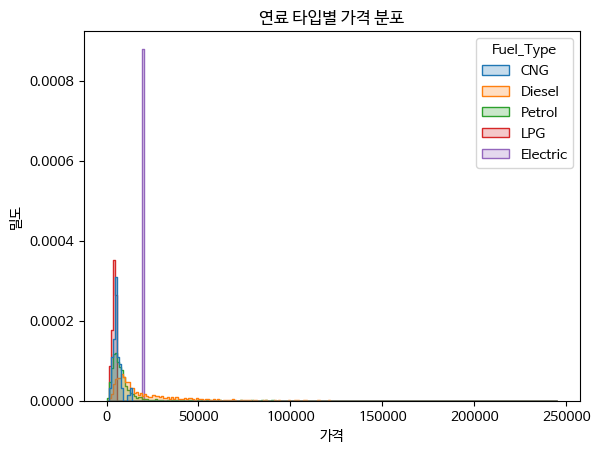

In [70]:
sns.histplot(data=df, x='Price', hue='Fuel_Type', element='step', stat='density', common_norm=False)
plt.title('연료 타입별 가격 분포')
plt.xlabel('가격')
plt.ylabel('밀도')
plt.show()

In [71]:
# 국가별 중고차 가격

# 구동방식별 중고차 가격

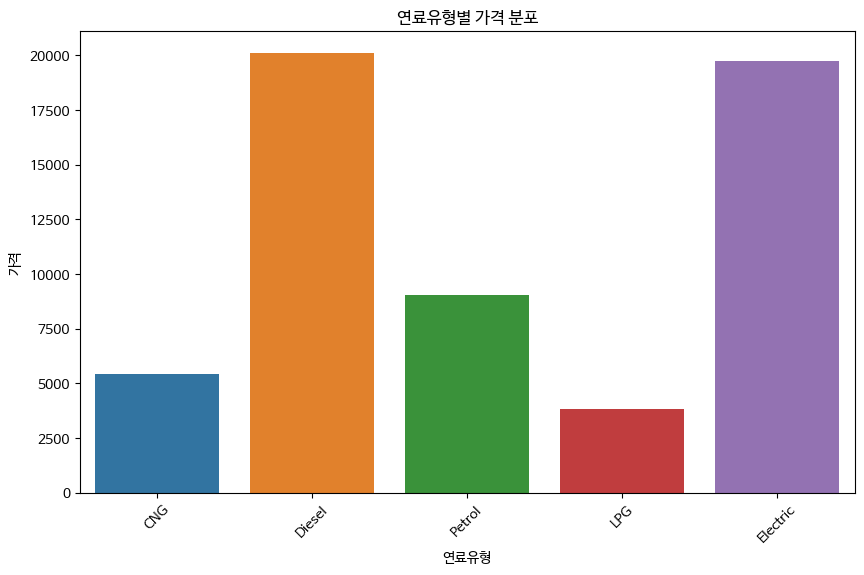

In [72]:
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='Fuel_Type', y='Price', data=df, ci=None)  # ci=None으로 신뢰구간을 표시하지 않습니다.

plt.title('연료유형별 가격 분포')  # 그래프의 제목을 설정합니다.
plt.xlabel('연료유형')  # x축 라벨을 설정합니다.
plt.ylabel('가격')  # y축 라벨을 설정합니다.
plt.xticks(rotation=45)  # x축 라벨을 회전시켜 겹침을 방지합니다.
plt.show()

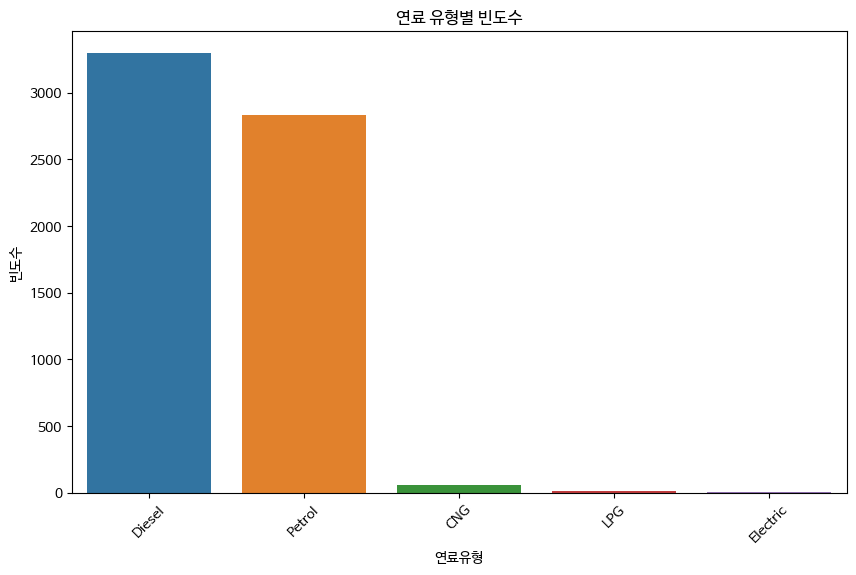

In [73]:
# 연료유형별 중고차 수

Fuel_Type_counts = df['Fuel_Type'].value_counts()

# 빈도수를 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x=Fuel_Type_counts.index, y=Fuel_Type_counts.values)
plt.title('연료 유형별 빈도수')
plt.xlabel('연료유형')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # 연료명이 긴 경우 겹치지 않도록 회전
plt.show()

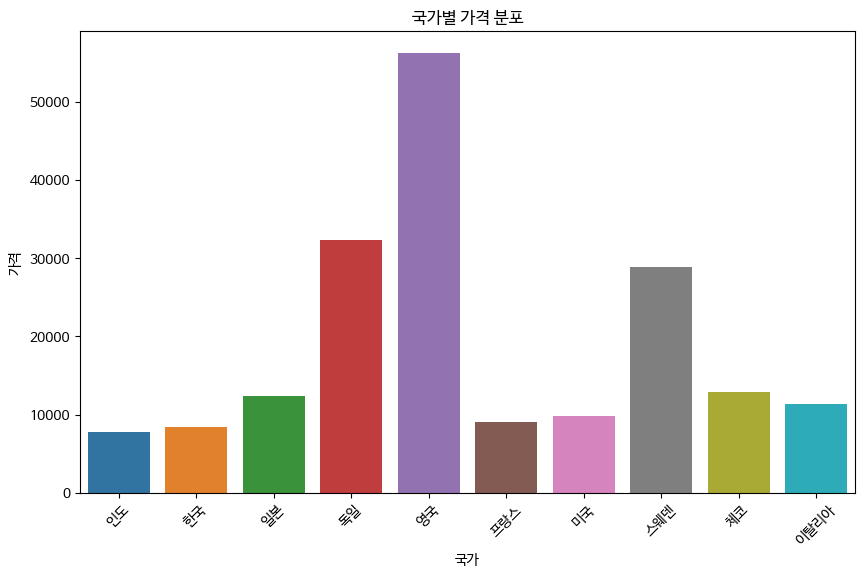

In [74]:
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='Nationality', y='Price', data=df, ci=None)  # ci=None으로 신뢰구간을 표시하지 않습니다.

plt.title('국가별 가격 분포')  # 그래프의 제목을 설정합니다.
plt.xlabel('국가')  # x축 라벨을 설정합니다.
plt.ylabel('가격')  # y축 라벨을 설정합니다.
plt.xticks(rotation=45)  # x축 라벨을 회전시켜 겹침을 방지합니다.
plt.show()

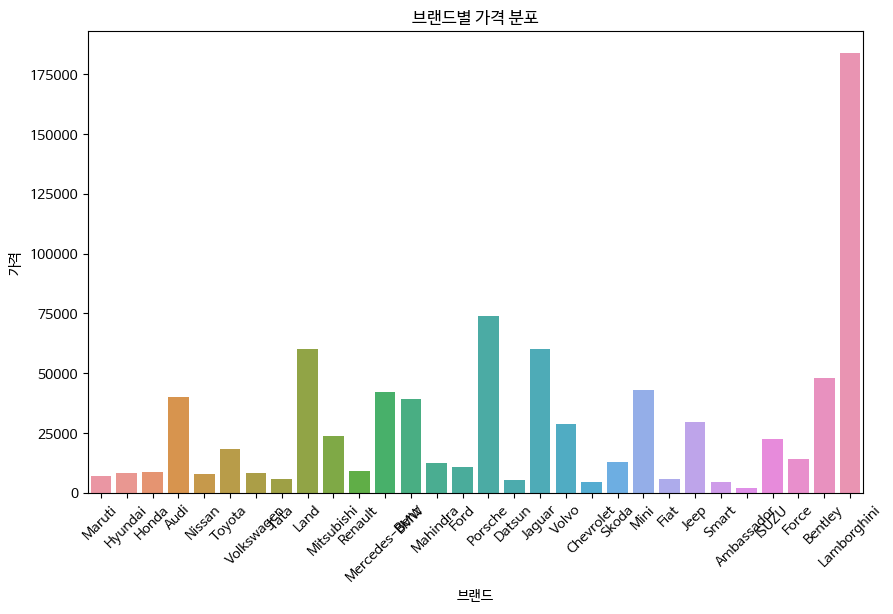

In [75]:
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='Brand', y='Price', data=df, ci=None)  # ci=None으로 신뢰구간을 표시하지 않습니다.

plt.title('브랜드별 가격 분포')  # 그래프의 제목을 설정합니다.
plt.xlabel('브랜드')  # x축 라벨을 설정합니다.
plt.ylabel('가격')  # y축 라벨을 설정합니다.
plt.xticks(rotation=45)  # x축 라벨을 회전시켜 겹침을 방지합니다.
plt.show()

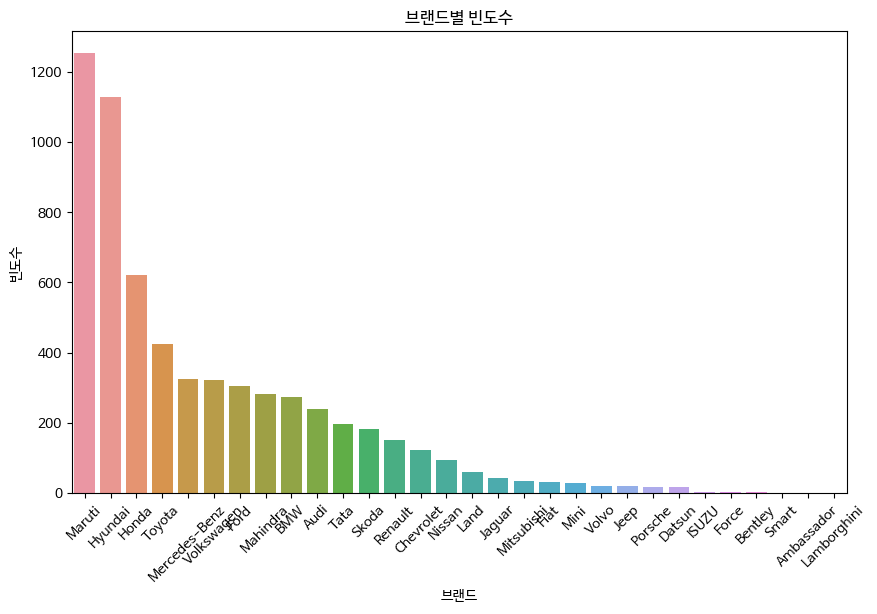

In [76]:
# 브랜드별 중고차 수

Brand_counts = df['Brand'].value_counts()

# 빈도수를 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x=Brand_counts.index, y=Brand_counts.values)
plt.title('브랜드별 빈도수')
plt.xlabel('브랜드')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # 브랜드명이 긴 경우 겹치지 않도록 회전
plt.show()

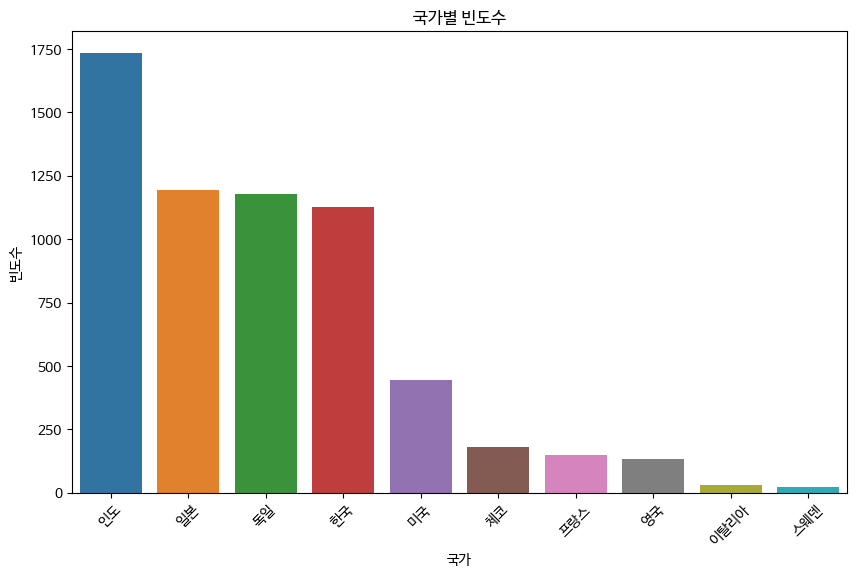

In [77]:
# 국가별 중고차 수

Nationality_counts = df['Nationality'].value_counts()

# 빈도수를 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x=Nationality_counts.index, y=Nationality_counts.values)
plt.title('국가별 빈도수')
plt.xlabel('국가')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # 국가명이 긴 경우 겹치지 않도록 회전
plt.show()

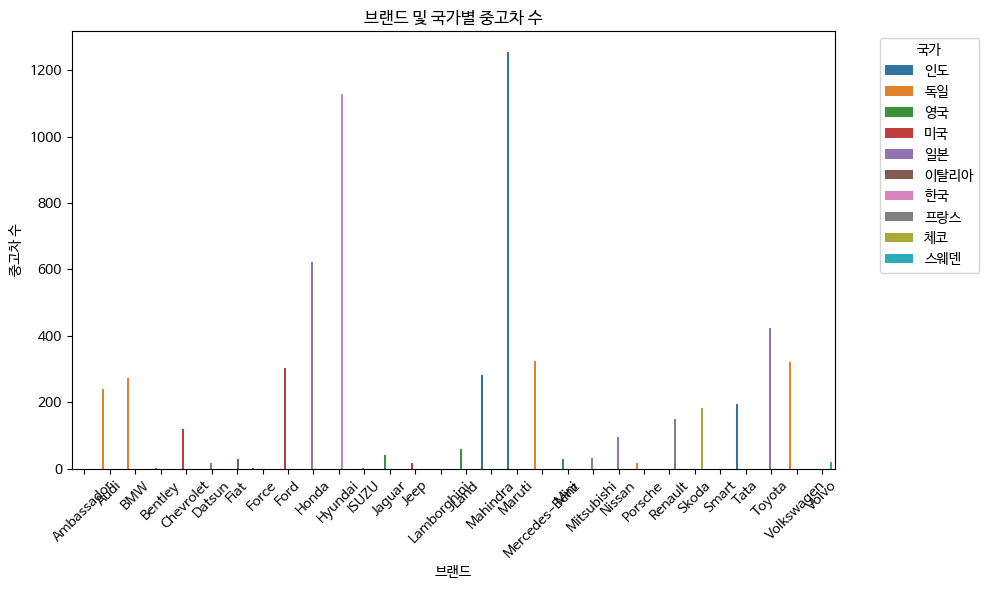

In [78]:
brand_nationality_counts = df.groupby(['Brand', 'Nationality']).size().reset_index(name='Counts')

# 빈도수를 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Counts', hue='Nationality', data=brand_nationality_counts)
plt.title('브랜드 및 국가별 중고차 수')
plt.xlabel('브랜드')
plt.ylabel('중고차 수')
plt.xticks(rotation=45)  # 브랜드명이 긴 경우 겹치지 않도록 회전
plt.legend(title='국가', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 차트 밖에 배치
plt.tight_layout()  # 그래프의 레이아웃을 조정
plt.show()

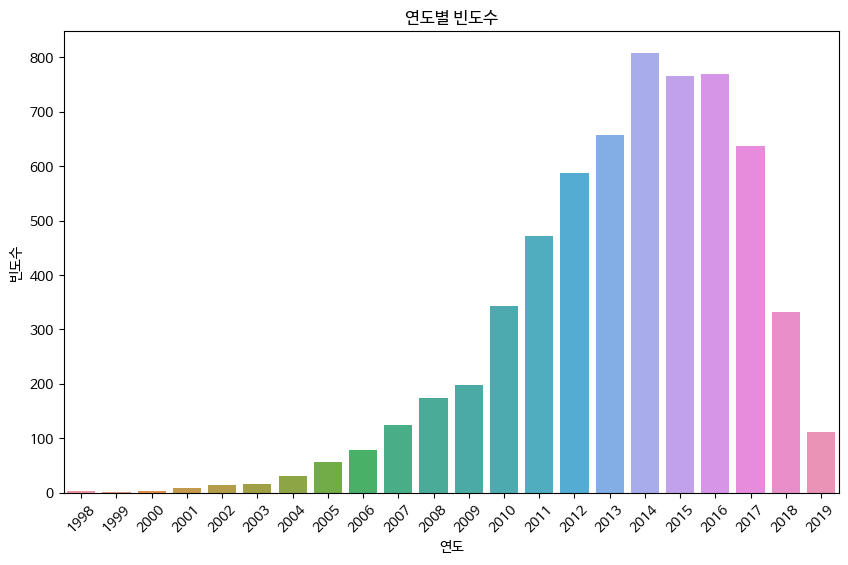

In [79]:
# 연도별 중고차 수

Year_counts = df['Year'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=Year_counts.index, y=Year_counts.values)
plt.title('연도별 빈도수')
plt.xlabel('연도')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # 국가명이 긴 경우 겹치지 않도록 회전
plt.show()

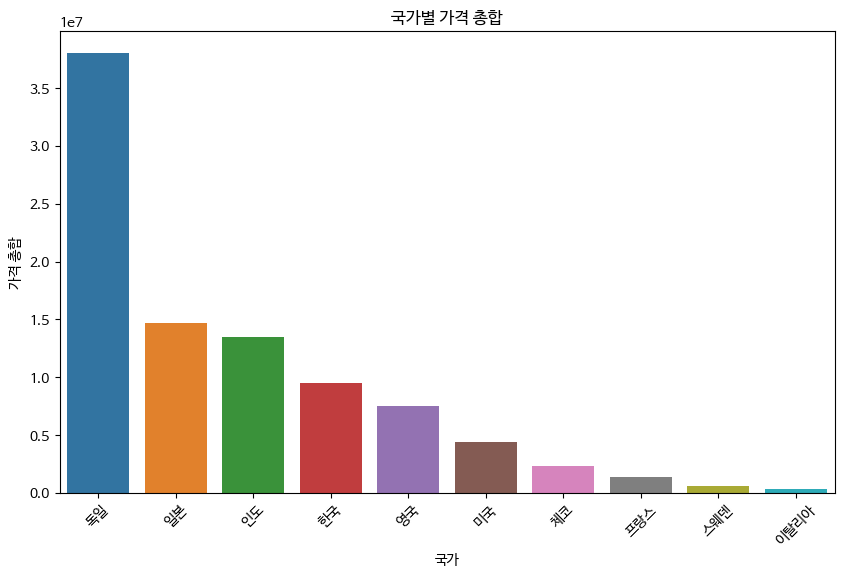

In [80]:
Nationality_price_sum = df.groupby('Nationality')['Price'].sum().sort_values(ascending=False).reset_index()

# 총합을 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Nationality', y='Price', data=Nationality_price_sum)
plt.title('국가별 가격 총합')
plt.xlabel('국가')
plt.ylabel('가격 총합')
plt.xticks(rotation=45)  # 국가명이 긴 경우 겹치지 않도록 회전
plt.show()

수입적으로 봤을 때 비싸더라도 독일차를 판매하는 것이 중고차 판매회사에게 이익을 가져다 줄 수 있을것이라 판단

점유율은 인도와 일본이 독일보다 높지만 가격 총합의 측면으로 보았을 때

In [81]:
# 지역별
df['Location'].value_counts()

Mumbai        817
Hyderabad     758
Kochi         676
Coimbatore    664
Pune          632
Delhi         572
Kolkata       552
Chennai       505
Jaipur        424
Bangalore     365
Ahmedabad     233
Name: Location, dtype: int64

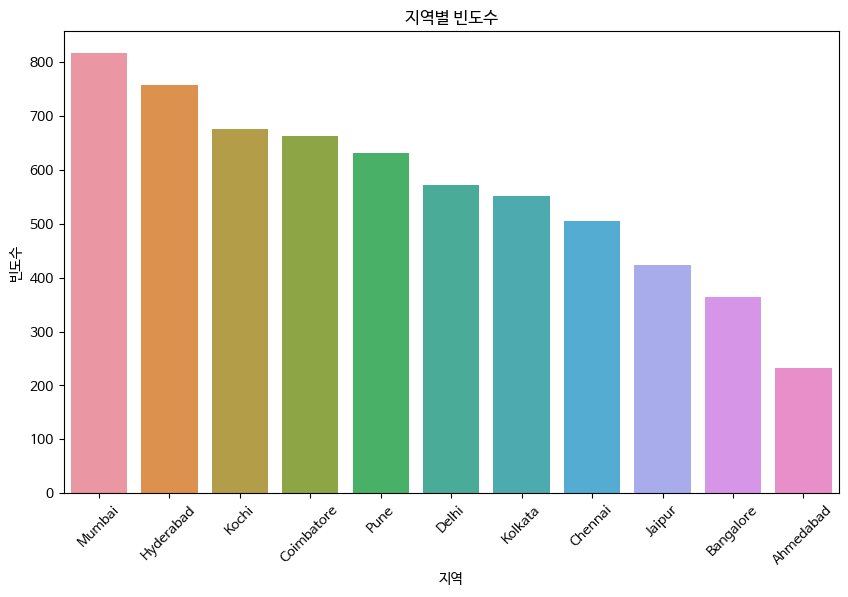

In [83]:
# 지역별 중고차수
Location_counts = df['Location'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=Location_counts.index, y=Location_counts.values)
plt.title('지역별 빈도수')
plt.xlabel('지역')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # 지역명이 긴 경우 겹치지 않도록 회전
plt.show()

In [ ]:
# ~ 별 가격과 차량수
# owner_type
# 변속기
# 연료
# 국가별
# 브랜드별
# 지역별
# 연도별

In [84]:
# linearregression 모델
# linear 모델 결과 확인
def get_results(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred_test = reg.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [85]:
# 랜덤포래스트
def get_results_rf(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    pred_test = rf.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [ ]:
# 저렴한 자동차를 선호한다--저렴한 자동차 수가 많다
# 

In [ ]:
# 가성비 좋은 차를 선호하는가
# -> 고급차를 선호
# 독일차를 팔면 중고차 시장에서 살아남을것



단순선형회귀분석

H0: ~는 중고차 가격에 영향을 미치지 않는다.

H1: ~는 중고차 가격에 영향을 미친다.


다중선형회귀분석

H0: 모든 독립변수들은 중고차 가격에 영향을 미치지않는다.

H1: 적어도 하나의 독립변수가 중고차 가격에 영향을 미친다.


분산분석(모델의 유의성 검정)

H0: 모든 독립변수들은 중고차 가격에 영향을 미치지 않는다.

H1: 모든 독립변수들 중 적어도 하나는 중고차 가격에 영향을 미친다.


상관분석

H0: 변수간의 상관관계가 없다

H1: 변수간의 상관관계가 있다.




적절한 변수를 선택하고, 최종 모델을 구축하여 중고차 가격을 예측하기..

In [ ]:
reg_model = smf.ols(formula = 'Price~Mileage_kml', data = df)
reg_result = reg_model.fit()
print(reg_result.summary())

In [ ]:
reg_model = smf.ols(formula = 'Price~Power_bhp', data = df)
reg_result = reg_model.fit()
print(reg_result.summary())

In [ ]:
reg_model = smf.ols(formula = 'Price~Seats', data = df)
reg_result = reg_model.fit()
print(reg_result.summary())

In [ ]:
# H0: 지역별로 가격에 차이가 없다
# H1: 지역별로 가격에 차이가 있다

In [78]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [81]:
# 정규성검정
statistic, p = stats.shapiro(df[df['Location']=='Mumbai']['Price'])
print('Mumbai: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Pune']['Price'])
print('Pune: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Chennai']['Price'])
print('Chennai: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Coimbatore']['Price'])
print('Coimbatore: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Hyderabad']['Price'])
print('Hyderabad: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Jaipur']['Price'])
print('Jaipur: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Kochi']['Price'])
print('Kochi: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Kolkata']['Price'])
print('Kolkata: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Delhi']['Price'])
print('Delhi: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Bangalore']['Price'])
print('Bangalore: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Location']=='Ahmedabad']['Price'])
print('Ahmedabad: statistic={}, p-value={}'.format(statistic, p))

Mumbai: statistic=0.6759626269340515, p-value=1.715711814084178e-36
Pune: statistic=0.6456551551818848, p-value=1.5410251557990245e-33
Chennai: statistic=0.6095303297042847, p-value=9.53366414297261e-32
Coimbatore: statistic=0.7549868822097778, p-value=4.640089600548866e-30
Hyderabad: statistic=0.5923765301704407, p-value=3.111339133840771e-38
Jaipur: statistic=0.6974382400512695, p-value=1.3864843625353575e-26
Kochi: statistic=0.650905966758728, p-value=9.3554185989151e-35
Kolkata: statistic=0.4854876399040222, p-value=1.0698518721056916e-36
Delhi: statistic=0.6042296290397644, p-value=6.410319210741853e-34
Bangalore: statistic=0.7264910936355591, p-value=1.0751961145717981e-23
Ahmedabad: statistic=0.6644142866134644, p-value=5.960177606226599e-21


In [ ]:
# p값이 모두 0.05보다 크기때문에 정규성을 만족하지 않음...

In [90]:
# 등분산성검정
stats.bartlett(
    df[df['Location']=='Mumbai']['Price'],
    df[df['Location']=='Pune']['Price'],
    df[df['Location']=='Chennai']['Price'],
    df[df['Location']=='Coimbatore']['Price'],
    df[df['Location']=='Hyderabad']['Price'],
    df[df['Location']=='Jaipur']['Price'],
    df[df['Location']=='Kochi']['Price'],
    df[df['Location']=='Kolkata']['Price'],
    df[df['Location']=='Delhi']['Price'],
    df[df['Location']=='Bangalore']['Price'],
    df[df['Location']=='Ahmedabad']['Price']
)


BartlettResult(statistic=769.0590008538225, pvalue=9.225643066376395e-159)

In [96]:
# 아노바검정
f_results_Location = stats.f_oneway(
    df[df['Location']=='Mumbai']['Price'],
    df[df['Location']=='Pune']['Price'],
    df[df['Location']=='Chennai']['Price'],
    df[df['Location']=='Coimbatore']['Price'],
    df[df['Location']=='Hyderabad']['Price'],
    df[df['Location']=='Jaipur']['Price'],
    df[df['Location']=='Kochi']['Price'],
    df[df['Location']=='Kolkata']['Price'],
    df[df['Location']=='Delhi']['Price'],
    df[df['Location']=='Bangalore']['Price'],
    df[df['Location']=='Ahmedabad']['Price']
)

# f, p값 출력
f, p = f_results_Location.statistic.round(3), f_results_Location.pvalue.round(3)

print('One-way ANOVA')
print('F 통계량: {}'.format(f))
print('p-value: {}'.format(p))

One-way ANOVA
F 통계량: 39.692
p-value: 0.0


In [ ]:
# 연료유형별
# owner_type별
# transmission별
# seats별

In [82]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

# ㅇㅇㅇㅇㅇ

In [ ]:
# 연료유형별로 가격평균에 차이가 없다/있다

In [92]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [93]:
# 정규성검정
statistic, p = stats.shapiro(df[df['Fuel_Type']=='Diesel']['Price'])
print('Diesel: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Fuel_Type']=='Petrol']['Price'])
print('Petrol: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Fuel_Type']=='LPG']['Price'])
print('LPG: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Fuel_Type']=='CNG']['Price'])
print('CNG: statistic={}, p-value={}'.format(statistic, p))

# LPG만 정규성을 띈다

Diesel: statistic=0.7403157949447632, p-value=0.0
Petrol: statistic=0.4448670744895935, p-value=0.0
LPG: statistic=0.9055684804916382, p-value=0.2519165873527527
CNG: statistic=0.8620015382766724, p-value=1.105625051422976e-05


In [94]:
# 등분산성검정
stats.bartlett(
    df[df['Fuel_Type']=='Diesel']['Price'],
    df[df['Fuel_Type']=='Petrol']['Price'],
    df[df['Fuel_Type']=='LPG']['Price'],
    df[df['Fuel_Type']=='CNG']['Price']
)


BartlettResult(statistic=967.995060914454, pvalue=1.5771313339322574e-209)

In [95]:
# 아노바검정
f_results_fuel = stats.f_oneway(
    df[df['Fuel_Type']=='Diesel']['Price'],
    df[df['Fuel_Type']=='Petrol']['Price'],
    df[df['Fuel_Type']=='LPG']['Price'],
    df[df['Fuel_Type']=='CNG']['Price']
)

# f, p값 출력
f, p = f_results_fuel.statistic.round(3), f_results_fuel.pvalue.round(3)

print('One-way ANOVA')
print('F 통계량: {}'.format(f))
print('p-value: {}'.format(p))

One-way ANOVA
F 통계량: 230.224
p-value: 0.0


In [97]:
grouped_data = [group['Price'].values for name, group in df.groupby('Fuel_Type')]

# Kruskal-Wallis H 검정을 수행합니다.
H_statistic, p_value = stats.kruskal(*grouped_data)

print(f"Kruskal-Wallis H statistic: {H_statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis H statistic: 1242.237552441864
P-value: 1.1102382606689806e-267


In [ ]:
# 정규성을 만족하는 것이 LPG밖에 없어 비모수검정인 Kruskal-Wallis 검정을 수행한 결과 p값이 0.05보다 작기때문에
# 귀무가설을 기각하므로 연료유형별로 가격차이가 있다고 할 수있다.

In [101]:
df_Diesel = df[df['Fuel_Type']=='Diesel']['Price']
df_Petrol = df[df['Fuel_Type']=='Petrol']['Price']
df_LPG = df[df['Fuel_Type']=='LPG']['Price']
df_CNG = df[df['Fuel_Type']=='CNG']['Price']

In [103]:
# 가설_Diesel, Petrol
# 귀무가설: Diesel과 Petrol 간에 가격평균에 차이가 없다.
# 대립가설: Diesel과 Petrol 간에 가격평균에 차이가 있다.

t_result = stats.ttest_ind(df_Diesel, df_Petrol)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p))

# 유의수준 5%에서 유의확률 p값이 0.0으로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
# 따라서 Diesel과 Petrol 간에 가격평균에 차이가 있다고 할 수 있다.
# t 통계량이 양수이므로 Diesel 연료의 차량 가격 평균이 Petrol보다 크다는 것을 알 수있다.

2-Sample t-test
t 통계량:25.708
p-value:0.0


In [143]:
df.head(0)

,level_0,index,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Brand,Nationality,Category


In [144]:
# 데이터프레임에서 "Engine_CC" 열의 값을 기준으로 차량을 분류하고 새로운 열 "Category"를 추가
def classify_vehicle(Engine_CC):
    if Engine_CC < 1200:
        return "소형 차량"
    elif 1200 <= Engine_CC < 1500:
        return "중형 차량"
    elif 1500 <= Engine_CC < 2000:
        return "대형 차량"
    elif Engine_CC >= 2000:
        return "SUV 또는 럭셔리 차량"
df['Category'] = df['Engine_CC'].apply(classify_vehicle)

In [145]:
# 차량 별로 가격평균에 차이가 없다/있다

In [146]:
df.Category.unique()

array(['소형 차량', '대형 차량', '중형 차량', 'SUV 또는 럭셔리 차량'], dtype=object)

In [147]:
# 정규성검정
statistic, p = stats.shapiro(df[df['Category']=='소형 차량']['Price'])
print('소형 차량: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Category']=='중형 차량']['Price'])
print('중형 차량: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Category']=='대형 차량']['Price'])
print('대형 차량: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Category']=='SUV 또는 럭셔리 차량']['Price'])
print('SUV 또는 럭셔리 차량: statistic={}, p-value={}'.format(statistic, p))

소형 차량: statistic=0.9730404019355774, p-value=1.2623561969141128e-18
중형 차량: statistic=0.8389719724655151, p-value=2.4903511970379925e-39
대형 차량: statistic=0.8317849636077881, p-value=4.3402814649609785e-34
SUV 또는 럭셔리 차량: statistic=0.8313438296318054, p-value=4.007445749655417e-34


In [148]:
# 등분산성검정
stats.bartlett(
    df[df['Category']=='소형 차량']['Price'],
    df[df['Category']=='중형 차량']['Price'],
    df[df['Category']=='대형 차량']['Price'],
    df[df['Category']=='SUV 또는 럭셔리 차량']['Price']
)


BartlettResult(statistic=8277.551427357013, pvalue=0.0)

In [149]:
# 아노바검정
f_results = stats.f_oneway(
    df[df['Category']=='소형 차량']['Price'],
    df[df['Category']=='중형 차량']['Price'],
    df[df['Category']=='대형 차량']['Price'],
    df[df['Category']=='SUV 또는 럭셔리 차량']['Price']
)

# f, p값 출력
f, p = f_results.statistic.round(3), f_results.pvalue.round(3)

print('One-way ANOVA')
print('F 통계량: {}'.format(f))
print('p-value: {}'.format(p))

One-way ANOVA
F 통계량: 996.58
p-value: 0.0


In [150]:
grouped_data = [group['Price'].values for name, group in df.groupby('Category')]

# Kruskal-Wallis H 검정을 수행합니다.
H_statistic, p_value = stats.kruskal(*grouped_data)

print(f"Kruskal-Wallis H statistic: {H_statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis H statistic: 2552.8529956963266
P-value: 0.0


In [154]:
df['Category'].value_counts()

소형 차량            1938
중형 차량            1802
대형 차량            1229
SUV 또는 럭셔리 차량    1229
Name: Category, dtype: int64

In [158]:
df_small = df[df['Category']=='소형 차량']['Price']
df_medium = df[df['Category']=='중형 차량']['Price']
df_big = df[df['Category']=='대형 차량']['Price']
df_luxury = df[df['Category']=='SUV 또는 럭셔리 차량']['Price']

In [159]:
df_small

0        2682.68
2        6898.32
5        3602.46
23       2866.64
27       4215.64
          ...   
6182     9902.92
6187     6269.81
6192     8477.27
6193    10822.70
6197        7.08
Name: Price, Length: 1938, dtype: float64

In [160]:
df_luxury

7       26826.80
13      41389.92
14      26826.80
15      22994.40
19      42922.88
          ...   
6162    49683.23
6163    36806.37
6172    31793.59
6173    17077.17
6180    50005.16
Name: Price, Length: 1229, dtype: float64

In [128]:
# 가설_소형차량, 중형차량
# 귀무가설: 소형차량과 중형차량 간에 가격평균에 차이가 없다.
# 대립가설: 소형차량과 중형차량 간에 가격평균에 차이가 있다.

t_result = stats.ttest_ind(df_small, df_medium)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p))

# 유의수준 5%에서 유의확률 p값이 0.0으로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
# 따라서 소형차량과 중형차량 간에 가격평균에 차이가 있다고 할 수 있다.
# t 통계량이 음수이므로 소형차량 가격 평균이 중형차량보다 작다는 것을 알 수있다

2-Sample t-test
t 통계량:-20.494
p-value:0.0


In [161]:
# 가설_대형차량, SUV 또는 럭셔리 차량
# 귀무가설: 대형차량과 SUV 또는 럭셔리 차량 간에 가격평균에 차이가 없다.
# 대립가설: 대형차량과 SUV 또는 럭셔리 차량 간에 가격평균에 차이가 있다.

t_result = stats.ttest_ind(df_medium, df_luxury)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p))

# 유의수준 5%에서 유의확률 p값이 0.0으로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
# 따라서 대형차량과 SUV 또는 럭셔리 차량 간에 가격평균에 차이가 있다고 할 수 있다.
# t 통계량이 음수이므로 대형차량 가격 평균이 SUV 또는 럭셔리 차량 보다 작다는 것을 알 수있다

2-Sample t-test
t 통계량:-36.497
p-value:0.0


In [104]:
# 회귀모델생성

# train/test data 분리
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 444)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (4338, 16)
test data size: (1860, 16)


In [105]:
# 선형회귀분석
reg_model = smf.ols(formula = "Price ~ Year + Kilometers_Driven + Mileage_kml + Engine_CC + Power_bhp", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

# 분석 자료수: 4338개, 잔차 자유도: 4331, 모델자유도: 6임을 알 수 있다.
# 유의확률 p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다는 것을 알 수 있다.
# 수정된 R^2(수정된 결정계수)값이 0.659으로 모델을 통하여 65.9% 설명할 수 있다.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1676.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:51:27   Log-Likelihood:                -46184.
No. Observations:                4338   AIC:                         9.238e+04
Df Residuals:                    4332   BIC:                         9.242e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.786e+06   1.13e+0

In [106]:
# p값을 보았을 때 Mileage_kml의 p값이 0.878으로 유의수준 0.05보다 크기때문에 제외하고 다시 회귀모델을 생성한다.
# Mileage_kml을 제외한 선형회귀분석
reg_model = smf.ols(formula = 'Price ~ Year + Kilometers_Driven + Power_bhp', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2792.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:51:27   Log-Likelihood:                -46185.
No. Observations:                4338   AIC:                         9.238e+04
Df Residuals:                    4334   BIC:                         9.240e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.815e+06   1.06e+0

In [107]:
# p값을 보았을 때 설명변수 모두 유의수준 0.05보다 작기때문에 Price ~ Year + Kilometers_Driven + Engine_CC + Power_bhp + Seats 라는 회귀모델이 생성된다.

In [108]:
# 설명변수 간의 다중공선성 확인
df_train_x = df[['Year','Kilometers_Driven','Power_bhp']] # 생성한 회귀모델의 설명변수들 넣기
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2) # 오름차순정렬


# 다중공선성 한 결과 설명변수의 VIF가 모두 10보다 작기때문에 다중공선성을 따로 해결해주지 않아도 된다.

,variable,VIF
3,Power_bhp,1.00
2,Kilometers_Driven,1.26
1,Year,1.26
0,const,478869.62


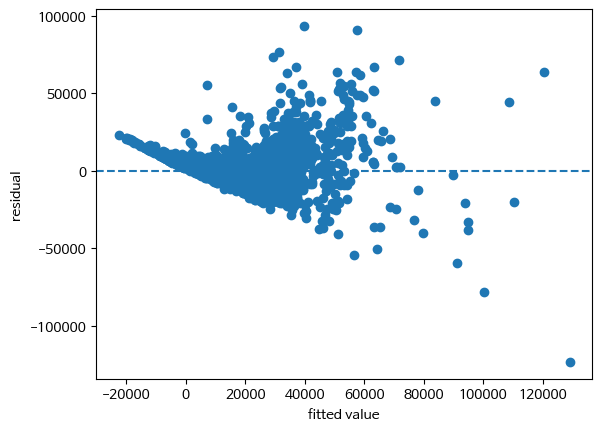

In [109]:
# 잔차의 가정 확인
# 잔차의 가정 -> 등분산성, 정규성, 독립성

# 등분산성
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")


# 잔차가 y=0을 기준으로 Random하게 산포가 안되어있으므로 등분산성을 만족x.....

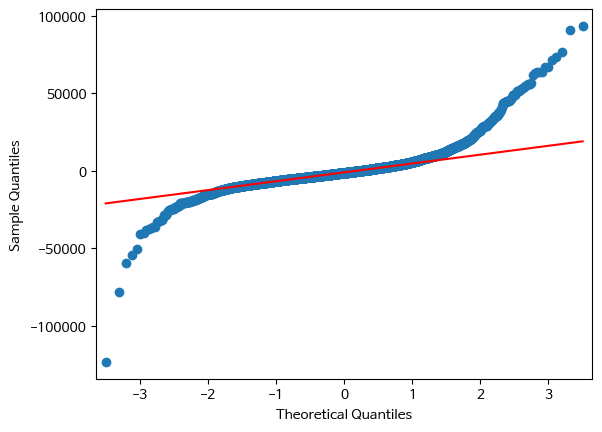

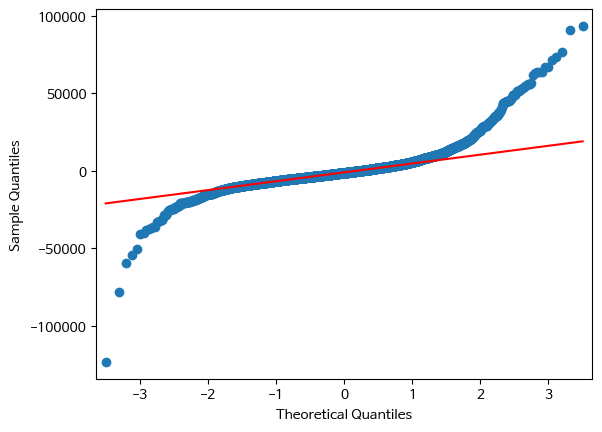

In [110]:
# 정규성
qqplot(reg_result.resid, line = 'q')


# 정규분포 직선을 중심으로 분포하므로 정규분포를 따른다고 할 수 있다.

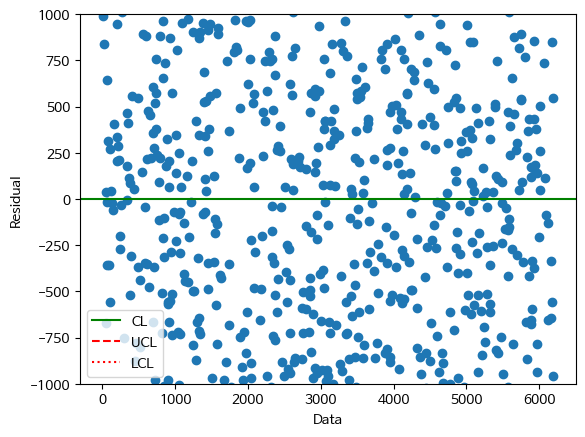

In [111]:
# 독립성
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.ylim(-1000,1000)
plt.axhline(y = 0, linestyle = "-", label = 'CL', color = 'green')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = 'dashed', color = 'red', label = 'UCL')
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = 'dotted', color = 'red', label = 'LCL')
plt.legend()


# 잔차가 y=0을 기준으로 관리상하한을 벗어나지않고, 랜덤하게 산포되어 있으므로 독립성을 만족시킨다.

In [ ]:
df.head(0)

In [86]:
# 상관분석
# price-mileage, price-kilometers_driven, 

In [87]:
corr, pval = stats.pearsonr(df['Price'], df['Mileage_kml'])
print("Correlation Analysis")
print('corr: {0:0.3f}'.format(corr))
print('p-value : {0:0.3f}'.format(pval))

Correlation Analysis
corr: -0.327
p-value : 0.000


In [ ]:
위치

In [ ]:
df.head(1)

In [ ]:
# 다중공선성
df1 = df[['Year', 'Seats', 'Kilometers_Driven', 'Mileage_kml', 'Engine_CC', 'Power_bhp']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df1, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df1, cmap = 'bwr', annot = True, mask = mask, linewidths =.5, cbar_kws={'shrink':.5},
           vmin = -1, vmax =1)

plt.show()

In [ ]:
# 데이터 분할
df_final_dummy = df_final_dummy.fillna(0) 
df_y = df_final_dummy['Price']
df_x = df_final_dummy.drop('Price', axis=1, inplace=False)
#df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=1234)

In [ ]:
# lasso
# 모델 생성
lasso = Lasso(random_state=1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)


In [ ]:
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({"Coef": lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

In [ ]:
# 회귀계수 그래프
df_lasso_coef.plot.barh(y = "Coef", legend = False)

In [ ]:
# 모델의 성능
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

In [ ]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

In [ ]:
# ridge
# 모델 생성
ridge = Ridge(random_state=1234, alpha = 1)
ridge.fit(df_train_x, df_train_y)

In [ ]:
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef": ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

In [ ]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y = "Coef", legend = False)

In [ ]:
# 75 Page
# 모델의 성능
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

In [ ]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

In [ ]:
# elasticnet
elastic = ElasticNet(random_state=1234, alpha = 1, l1_ratio = 0.5)
elastic.fit(df_train_x, df_train_y)


In [ ]:
# 회귀계수 확인
df_elastic_coef = pd.DataFrame({"Coef": elastic.coef_}, index = df_train_x.columns)
df_elastic_coef

In [ ]:
# 회귀계수 그래프
df_elastic_coef.plot.barh(y = "Coef", legend = False)

In [ ]:
# 모델의 성능
train_pred =elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

In [ ]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

In [ ]:
#선형회귀 의사결정나무 랜덤포레스트 그래디언트부스팅

In [ ]:
# scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()
X = mm.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

In [ ]:
X = mm.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1))
y = car_td['Price']

get_results(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

In [ ]:
from sklearn.preprocessing import RobustScale

In [ ]:
rs = RobustScaler()
X = rs.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

In [ ]:
rs = RobustScaler()
X = rs.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1))
y = car_td['Price']

get_results(X, y)

In [ ]:
# 정확도
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

In [ ]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

In [83]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [84]:
df = df[(df['Fuel_Type'] == 'Diesel') | (df['Fuel_Type'] == 'Petrol')]

In [86]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [87]:
def get_Brand_df(Brand):
    car = df[df['Brand'] == Brand]

    car.reset_index(drop=True, inplace=True)

    car['Owner'] = range(0,len(car))

    for i in range(0,len(car)):
        if car['Owner_Type'][i] == 'First':
            car['Owner'][i] = 1

        elif car['Owner_Type'][i] == 'Second':
            car['Owner'][i] = 2

        elif car['Owner_Type'][i] == 'Third':
            car['Owner'][i] = 3

        elif car['Owner_Type'][i] == 'Fourth & Above':
            car['Owner'][i] = 4

    car = pd.get_dummies(car, columns=['Location','Fuel_Type', 'Transmission'])

    car = car.drop(['Name', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'New_p'], axis=1)

    return(car)

In [88]:
# 가격예측
def get_car_price(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred = reg.predict(car)
    return(pred)

In [89]:
def get_car_price_rf(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)

    pred = rf_reg.predict(car)
    return(pred)